<a href="https://colab.research.google.com/github/corinnakeum1/DS-4002/blob/main/HedonicPricingCorinnaKeum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("airbnb_hw.csv")

# Display the first few rows
df.head()
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  object 
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(4), int64(3), object

In [5]:
# Convert 'Host Since' to datetime and drop rows with missing values
df['Host Since'] = pd.to_datetime(df['Host Since'], errors='coerce')
df.dropna(subset=['Host Since'], inplace=True)

# Fill missing 'Review Scores Rating' and 'Review Scores Rating (bin)' with median or placeholders
df['Review Scores Rating'].fillna(df['Review Scores Rating'].median(), inplace=True)
df['Review Scores Rating (bin)'].fillna('Unknown', inplace=True)

# Convert 'Zipcode' to string and fill missing values with a placeholder
df['Zipcode'] = df['Zipcode'].fillna("Unknown").astype(str)

# Convert 'Price' to numeric by removing any non-numeric characters, then cast to float
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

# Fill missing 'Beds' with median value
df['Beds'].fillna(df['Beds'].median(), inplace=True)


# Verify data types and missing values
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 30475 entries, 3 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Host Id                     30475 non-null  int64         
 1   Host Since                  30475 non-null  datetime64[ns]
 2   Name                        30475 non-null  object        
 3   Neighbourhood               30475 non-null  object        
 4   Property Type               30472 non-null  object        
 5   Review Scores Rating (bin)  30475 non-null  object        
 6   Room Type                   30475 non-null  object        
 7   Zipcode                     30475 non-null  object        
 8   Beds                        30475 non-null  float64       
 9   Number of Records           30475 non-null  int64         
 10  Number Of Reviews           30475 non-null  int64         
 11  Price                       30475 non-null  float64       


<ipython-input-5-ad15c91dc90e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review Scores Rating'].fillna(df['Review Scores Rating'].median(), inplace=True)
<ipython-input-5-ad15c91dc90e>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

<ipython-input-6-b0c828bdf1f3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Room Type', palette='Set2')


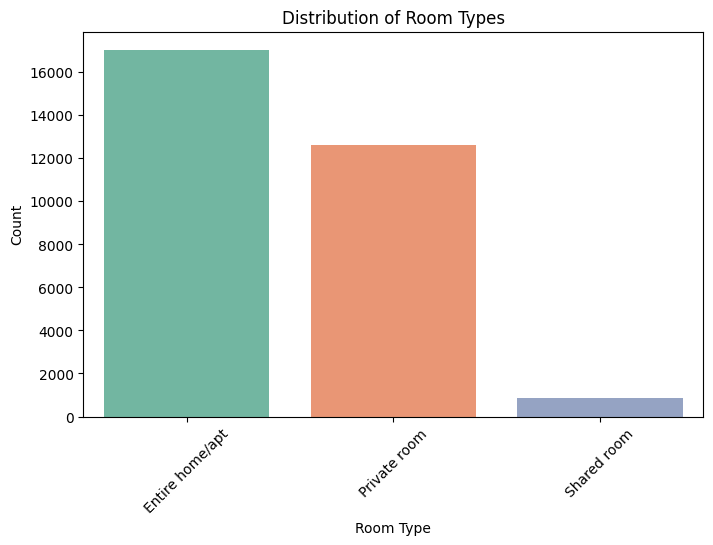

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned CSV data if not loaded yet
df = pd.read_csv("airbnb_hw.csv")

# distribution of room types
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Room Type', palette='Set2')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


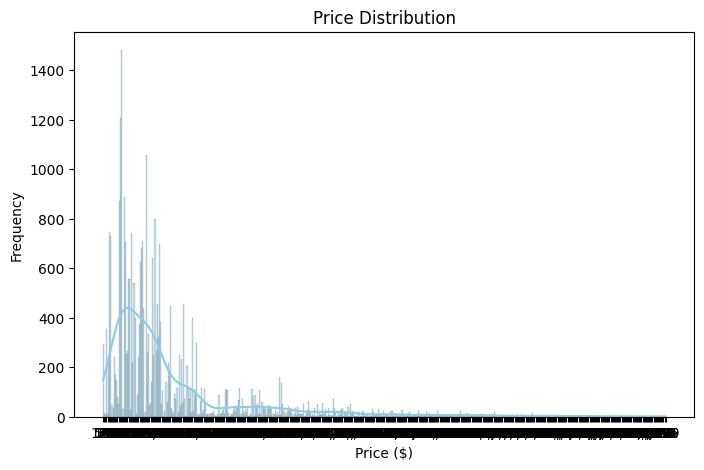

In [7]:
# price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()


In [15]:
# Example of renaming a column if needed
df.rename(columns={'Neighbourhood ': 'Neighbourhood'}, inplace=True)

plt.figure(figsize=(12, 6))
neighborhood_prices = df.groupby('Neighbourhood')['Price'].mean().sort_values(ascending=False)
neighborhood_prices.plot(kind='bar', color='teal')
plt.title('Average Price by Neighbourhood')
plt.ylabel('Average Price ($)')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=90)
plt.show()



TypeError: agg function failed [how->mean,dtype->object]

<Figure size 1200x600 with 0 Axes>